# Linear regression (predicting a continuous value):

** AIM: **
>     The goal is to explore the relationship between water salinity and water temperature using the CalCOFI dataset, and to assess whether water temperature can be predicted based on salinity.

** DataSet Description: **
>    The CalCOFI dataset encompasses over 60 years of oceanographic data, including physical, chemical, and biological measurements from more than 50,000 sampling stations off the coast of California. It is one of the most extensive time series of oceanographic data, providing valuable insights into climatic cycles, biological responses, and phenomena such as El Niño.

In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator



In [13]:
bottle = pd.read_csv("bottle.csv")
bottle.head(2)

/var/folders/fx/j2njn0rx1hq186_3l1d0w0pc0000gn/T/ipykernel_66961/3412107071.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle = pd.read_csv("bottle.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


<Axes: xlabel='T_degC', ylabel='Salnty'>

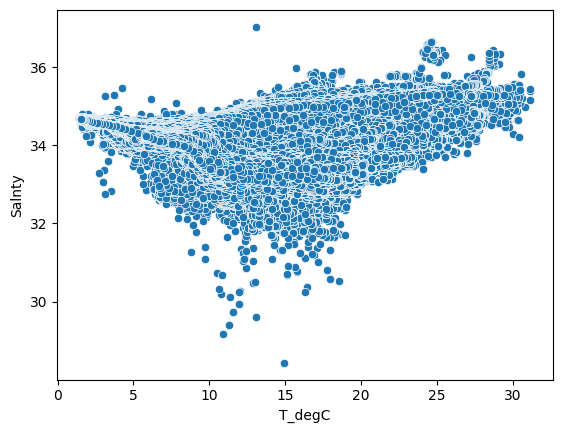

In [46]:
import seaborn as sns
sns.scatterplot(x=bottle['T_degC'],y=bottle['Salnty'])

In [15]:
# Extract 2 columns 'T_degC','Salnty' for pure and better showing
bottle_df = bottle[['T_degC','Salnty']]

# And called again
bottle_df.columns = ['Temperature', 'Salinity']

In [16]:
bottle_df = bottle_df[:][:500]      # lets take limit for speed regression calculating
bottle_df.head()

,Temperature,Salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


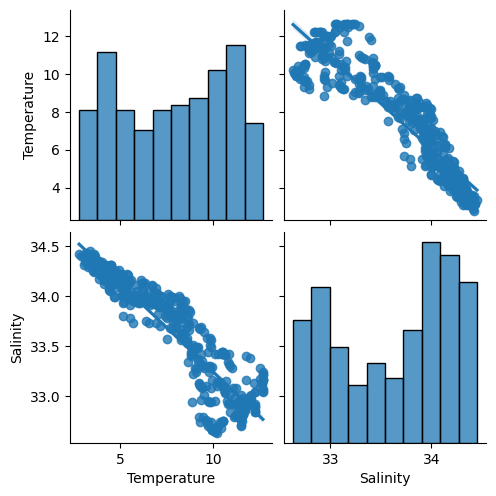

In [17]:
# See picture with scatter or plot method

# sns.lmplot(x="Salinity", y="Temperature", data=bottle_df, order=2, ci=None);
sns.pairplot(bottle_df, kind="reg")

In [18]:
# see how many null values we have

bottle_df.isnull().sum()

Temperature    1
Salinity       6
dtype: int64

In [19]:
# Drop NaN or missing input numbers

bottle_df.fillna(method='ffill', inplace=True)
#bottle_df.isnull().sum()

/var/folders/fx/j2njn0rx1hq186_3l1d0w0pc0000gn/T/ipykernel_66961/925152708.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bottle_df.fillna(method='ffill', inplace=True)


In [20]:
# Features chose

X = np.array(bottle_df['Salinity']).reshape(-1, 1)
y = np.array(bottle_df['Temperature']).reshape(-1, 1)

In [21]:
# Split data as %20 is test and %80 is train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [22]:
from sklearn.linear_model import LinearRegression

lin_df = LinearRegression()  
lin_df.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lin_df.predict(X_test)                                     # Predict Linear Model
accuracy_score = lin_df.score(X_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))


Linear Regression Model Accuracy Score: 82.7%


In [24]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score: 0.827


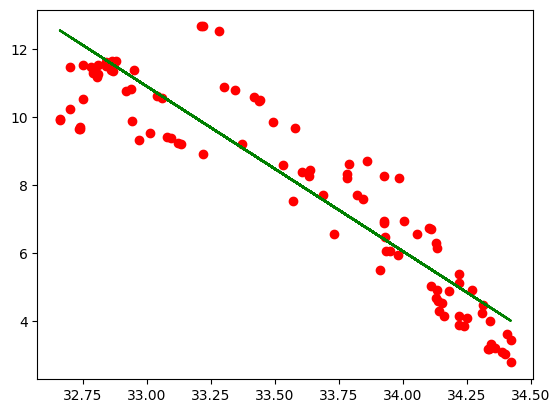

In [25]:
# Finally draw figure of Linear Regression Model

plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()

# 2.Multiple Linear Regression

In [26]:
mlin_df = LinearRegression()
mlin_df = mlin_df.fit(X_train, y_train)
mlin_df.intercept_       # constant b0
mlin_df.coef_            # variable coefficient

array([[-4.84772527]])

In [27]:
y_pred = mlin_df.predict(X_train)                                      # predict Multi linear Reg model
rmse = np.sqrt(mean_squared_error(y_train, mlin_df.predict(X_train)))
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.3}".format(r2_score(y_train, y_pred)));      # this is test error score

RMSE Score for Test set: 1.1
R2 Score for Test set: 0.853


## 2.1.Multiple Linear Regression Model Tunning

In [28]:
# cross validation method is giving better and clear result

cross_val_score(mlin_df, X, y, cv=10, scoring = 'r2').mean()

0.789772093115648

In [29]:
mlin_df.score(X_train, y_train)      # r2 value

0.853486743991655

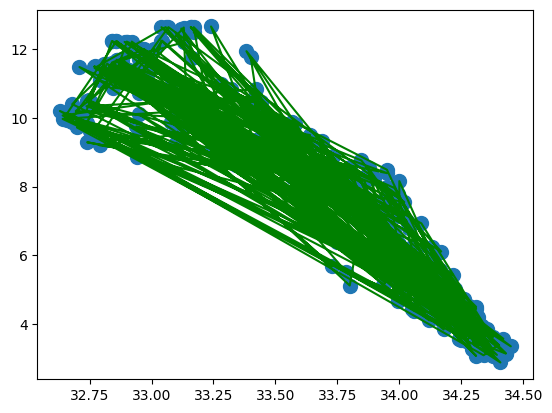

In [31]:
# Finally draw figure of Multiple Linear Regression Model

plt.scatter(X_train, y_train, s=100)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_pred), key=sort_axis)
X_test, y_pred = zip(*sorted_zip)
plt.plot(X_train, y_train, color='g')
plt.show()

# Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=5, random_state=0)
rf_reg.fit(X_train,y_train)
rf_predict = rf_reg.predict(X_train)
#rf_predict.mean()

/opt/homebrew/Cellar/jupyterlab/4.1.3/libexec/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


/var/folders/fx/j2njn0rx1hq186_3l1d0w0pc0000gn/T/ipykernel_66961/1586555389.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)


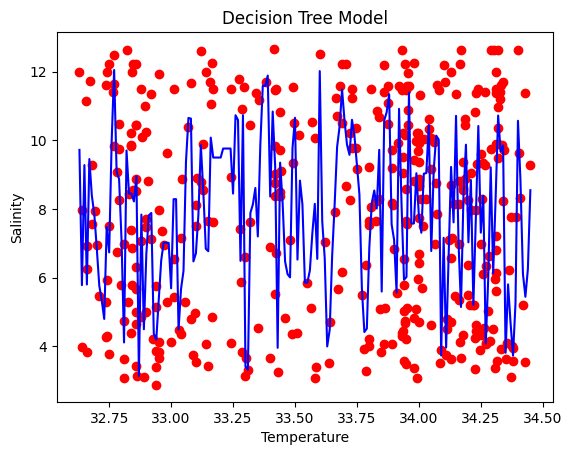

In [52]:
plt.scatter(X_train,y_train, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,rf_reg.predict(X_grid),color="b")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Decision Tree Model")
plt.show()

In [53]:
rmse = np.sqrt(mean_squared_error(y_train,rf_predict))
r2 = r2_score(y_train,rf_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 2.1
R2 Score for Test set: 0.47


# Model Performance Comparison

## Multiple Linear Regression (MLR):  
RMSE (Root Mean Squared Error): 0.8  
R² (Coefficient of Determination): 0.92  

## Random Forest (RF):

RMSE: 2.1  
R²: 0.47  

** Interpretation: **    
** R² Score ** 

> R² Score (0.85): This high value indicates that the MLR model explains 85% of the variance in water temperature based on salinity. This suggests a strong linear relationship between salinity and temperature, with the model capturing most of the variability in the data.
RMSE (0.8): A lower RMSE indicates that the predictions made by the MLR model are close to the actual observed values, reflecting good accuracy in temperature prediction based on salinity.
Random Forest:

> R² Score (0.47): This lower value suggests that the RF model explains only 47% of the variance in water temperature based on salinity, indicating a weaker relationship. The RF model captures less of the variability in the data compared to the MLR model.
RMSE (2.1): A higher RMSE compared to the MLR model indicates that the predictions made by the RF model are less accurate and deviate more from the actual observed values.


** RMSE: ** 
 > R² Score (0.47): This lower value suggests that the RF model explains only 47% of the variance in water temperature based on salinity, indicating a weaker relationship. The RF model captures less of the variability in the data compared to the MLR model.

>RMSE (2.1): A higher RMSE compared to the MLR model indicates that the predictions made by the RF model are less accurate and deviate more from the actual observed values


** Conclusion: ** 
>The Multiple Linear Regression model performs significantly better than the Random Forest model in predicting water temperature based on salinity from the CalCOFI dataset. The MLR model’s high R² score and low RMSE suggest that there is a strong linear relationship between water salinity and temperature, which the model captures effectively. Conversely, the Random Forest model, which typically handles non-linear relationships well, does not perform as well in this context, suggesting that the relationship between salinity and temperature is primarily linear and is better modeled by the MLR approach.